# Multi-Modal Genre Classification for Movies
### Given:
- A data point  xixi 
- A set of categories  y1,y2...yny1,y2...yn  that  xixi  can belong to. 

### Task :
Predict the correct category **yk**  for a new data point  **xk**  not present in the given dataset.
### Problem :
We don't know how the  **x**  and  **y**  are related mathematically.
### Assumption :
We assume there exists a function  ff  relating  xx  and  yy  i.e.  f(xi)=yif(xi)=yi 
### Approach :
Since  ff  is not known, we learn a function  gg , which approximates  ff .
### Important consideration :
- If  **f(xi)=g(xi)=y**  for all  **xi** , then the two functions  **f** and  **g**  are exactly equal. Needless to say, this won't realistically ever happen, and we'll only be able to approximate the true function  **f**  using  **g** . This means, sometimes the prediction **g(xi)**  will not be correct. And essentially, our whole goal is to find a  **g**  which makes a really low number of such errors. That's basically all that we're trying to do.
- For the sake of completeness, I should mention that this is a specific kind of learning problem which we call "Supervised Learning". Also, the idea that  gg  approximates  ff  well for data not present in our dataset is called "Generalization". It is absolutely paramount that our model generalizes, or else all our claims will only be true about data we already have and our predictions will not be correct.
- Finally, There are several other kinds, but supervised learning is the most popular and well studied kind.



### What's Multi-Modal Classification then?
In the machine learning community, the term Multi-Modal is used to refer to multiple kinds of data. For example, consider a YouTube video. It can be thought to contain 3 different modalities -
The video frames (visual modality)
The audio clip of what's being spoken (audio modality)
Some videos also come with the transcription of the words spoken in the form of subtitles (textual modality)
Consider, that I'm interested in classifying a song on YouTube as pop or rock. You can use any of the above 3 modalities to predict the genre - The video, the song itself, or the lyrics. But, needless to say, you can predict it much better if you could use all three simultaneously. This is what we mean by multi-modal classification.

##  Building your very own DataSet
For any machine learning algorithm to work, it is imperative that we collect data which is "representative". 

### What do we mean by data being "representative"?
Let's look at this from first principles. Mathematically, the premise of machine learning is that given input vairable X, and output variable y, **IF** there is a funcation such that **g(X)=y**, then if **g** is unknown, we can "learn" a fun For example, if you're trying to predict someone's movie preferences then X can be information about the person's gender, age, nationality and so on, while y can be the genre they most like to listen to!ction **f** which approximates **g**. At the very heart, its not at all different from what you may have earlier studied as "curve fitting". For example, if you're trying to predict someone's movie preferences then X can be information about the person's gender, age, nationality and so on, while y can be the genre they most like to listen to!


### Scraping data from 2 different movie sources - IMDB and TMDB

#### IMDB:http://www.imdb.com/
For those unaware, IMDB is the primary source of information about movies on the internet. It is immensely rich with posters, reviews, synopsis, ratings and many other information on every movie. We will use this as our primary data source.
#### TMDB:https://www.themoviedb.org/
TMDB, or The Movie DataBase, is an open source version of IMDB, with a free to use API that can be used to collect information. You do need an API key, but it can be obtained for free by just making a request after making a free account.
#### Note -
IMDB gives some information for free through the API, but doesn't release other information about movies. Here, we will keep it legal and only use information given to us for free and legally. However, scraping does reside on the moral fence, so to say. People often scrape data which isn't exactly publicly available for use from websites.


In [29]:
import urllib2 
import requests 
import json
import imdb
import time
import itertools
import wget
import os
import tmdbsimple as tmdb
import numpy as np 
import random
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import pickle 

In [30]:
# set here the path where you want the scrapped folders to be saved!
poster_folder = 'posters_final/'
if poster_folder.split('/')[0] in os.listdir('./'):
    print('Folder already exists')
else:
    os.mkdir('./' + poster_folder)
    print('Folder Created')

Folder already exists


In [31]:
# For the purpose of this example, i will be working with the 1999 Sci-Fi movie - "The Matrix"!
#Enter your own API key here to run the code below. 
api_key='ced76d9cf645f6f902af7d092bdcacfe'

tmdb.API_KEY = api_key

#this instantiates a tmdb "search" object which allows your to search for the movie
search = tmdb.Search() 


In [32]:
# Functions goes here
def grab_poster_tmdb(movie):
    response = search.movie(query=movie)
    id=response['results'][0]['id']
    movie = tmdb.Movies(id)
    posterp=movie.info()['poster_path']
    title=movie.info()['original_title']
    url='image.tmdb.org/t/p/original'+posterp
    title='_'.join(title.split(' '))
    strcmd='wget -O '+poster_folder+title+'.jpg '+url
    os.system(strcmd)
    #print(response['results'])
    
def get_movie_id_tmdb(movie):
    response = search.movie(query=movie)
    movie_id=response['results'][0]['id']
    return movie_id

def get_movie_info_tmdb(movie):
    response = search.movie(query=movie)
    movie_id=response['results'][0]['id']
    movie=tmdb.Movies(movie_id)
    info = movie.info()
    return info

def get_movie_genres_tmdb(movie):
    response=search.movie(query=movie)
    id=response['results'][0]['id']
    movie=tmdb.Movies(id)
    genres=movie.info()['genres']
    return genres


    

While the above functions have been made to make it easy to get genres, posters and ID, all the information that can be accessed can be seen by calling the function get_movie_info() as shown below.


In [33]:
print get_movie_genres_tmdb('Fight club')
print get_movie_genres_tmdb("The Matrix")

[{u'id': 18, u'name': u'Drama'}]
[{u'id': 28, u'name': u'Action'}, {u'id': 878, u'name': u'Science Fiction'}]


In [34]:
info=get_movie_info_tmdb("The Matrix")
print "All the Movie information from TMDB gets stored in a dictionary with the following keys for easy access -"
info.keys()

All the Movie information from TMDB gets stored in a dictionary with the following keys for easy access -


[u'poster_path',
 u'production_countries',
 u'revenue',
 u'overview',
 u'video',
 u'id',
 u'genres',
 u'title',
 u'tagline',
 u'vote_count',
 u'homepage',
 u'belongs_to_collection',
 u'original_language',
 u'status',
 u'spoken_languages',
 u'imdb_id',
 u'adult',
 u'backdrop_path',
 u'production_companies',
 u'release_date',
 u'popularity',
 u'original_title',
 u'budget',
 u'vote_average',
 u'runtime']

So, to get the tagline of the movie we can use the above dictionary key -

In [35]:
print('Matrix Tag Line:' + info['tagline'])

Matrix Tag Line:Welcome to the Real World.


### Time to get movie information from IMDB
Now that we know how to get information from TMDB, here's how we can get information about the same movie from imdb. This makes it possible for us to combine more information, and get a richer dataset. I urge you to try and see what dataset you can make, and go above and beyond the basic things I've done in this tutorial. Due to the differences between the two datasets, you will have to do some cleaning, however both of these datasets are extremely clean and it will be minimal.

In [36]:
# Create the IMDB object that will be used to access the IMDb's database
imdb_object = imdb.IMDb() #by default access the web

# Search for a movie (get a list of Movie Objects)
results = imdb_object.search_movie('The Matrix')

# As this returns a list of all movies containing the word "The Matrix", we pick the first element

movie = results[0]
imdb_object.update(movie)

print "All the information we can get about this movie from IMDB-"
movie.keys()




All the information we can get about this movie from IMDB-


[u'music department',
 'sound crew',
 'camera and electrical department',
 u'distributors',
 'rating',
 'runtimes',
 'costume designer',
 'make up',
 'year',
 'production design',
 'miscellaneous crew',
 'color info',
 u'casting department',
 'languages',
 'votes',
 'producer',
 'title',
 'mpaa',
 'assistant director',
 'writer',
 'production manager',
 'casting director',
 'visual effects',
 'top 250 rank',
 'set decoration',
 'editor',
 'certificates',
 u'costume department',
 'country codes',
 'language codes',
 'cover url',
 u'special effects department',
 'special effects companies',
 'sound mix',
 u'location management',
 'genres',
 'director',
 'stunt performer',
 'miscellaneous companies',
 'cinematographer',
 'art direction',
 'akas',
 'aspect ratio',
 u'production companies',
 'kind',
 u'art department',
 'countries',
 u'transportation department',
 'plot outline',
 'plot',
 'cast',
 u'animation department',
 'original music',
 u'editorial department',
 'canonical title',
 'l

In [37]:
print "The genres associated with the movie are - ",movie['genres']

The genres associated with the movie are -  [u'Action', u'Sci-Fi']


#### A small comparison of IMDB and TMDB 
Now we have both IMDB and TMDB lets compare them for the same movie

In [38]:
print ("The genres for THE MATRIX using IMDB -",movie['genres'])
 
print ("The genres for THE MATRIX using TMDB -",get_movie_genres_tmdb("The Matrix"))

('The genres for THE MATRIX using IMDB -', [u'Action', u'Sci-Fi'])
('The genres for THE MATRIX using TMDB -', [{u'id': 28, u'name': u'Action'}, {u'id': 878, u'name': u'Science Fiction'}])


As we can see, both the systems are correct, but the way they package information is different. TMDB calls it "Science Fiction" and has an ID for every genre. While IMDB calls it "Sci-Fi". Thus, it is important to keep track of these things when making use of both the datasets simultaneously.
Now that we know how to scrape information for one movie, let's take a bigger step towards scraping multiple movies?

#### Working with multiple movies : Obtaining Top 20 movies from TMDB
We first instantiate an object that inherits from class Movies from TMDB. Then We use the popular() class method (i.e. function) to get top movies. To get more than one page of results, the optional page argument lets us see movies from any specified page number.

In [39]:
all_movies = tmdb.Movies()
top_movies=all_movies.popular()

print(len(top_movies['results']))
top20_movs = top_movies['results']

20


In [40]:
for i in range(len(top20_movs)):
    mov=top20_movs[i]
    title = mov['title']
    print (title)
    if i == 4:
        break

Dawn of the Planet of the Apes
Rise of the Planet of the Apes
Guardians of the Galaxy
Mad Max: Fury Road
Jurassic World


In [41]:
for i in range(len(top20_movs)):
    mov=top20_movs[i]
    genre = mov['genre_ids']
    print (genre)
    if i == 4:
        break

[878, 28, 18, 53]
[53, 28, 18, 878]
[28, 878, 12]
[28, 12, 878, 53]
[28, 12, 878, 53]


In [42]:
#Create a tmdb genre object!
genres=tmdb.Genres()

list_of_genres=genres.list()['genres']
#print(list_of_genres)


Genre_ID_to_name={}
for i in range(len(list_of_genres)):
    genre_id=list_of_genres[i]['id']
    genre_name=list_of_genres[i]['name']
    Genre_ID_to_name[genre_id]=genre_name
    

In [43]:
for i in range(len(top20_movs)):
    mov=top20_movs[i]
    title=mov['title']
    genre = mov['genre_ids']
    genre_names = []
    for id in genre:
        genre_name=Genre_ID_to_name[id]
        genre_names.append(genre_name)
    print title, genre_names
    if i == 4:
        break;

Dawn of the Planet of the Apes [u'Science Fiction', u'Action', u'Drama', u'Thriller']
Rise of the Planet of the Apes [u'Thriller', u'Action', u'Drama', u'Science Fiction']
Guardians of the Galaxy [u'Action', u'Science Fiction', u'Adventure']
Mad Max: Fury Road [u'Action', u'Adventure', u'Science Fiction', u'Thriller']
Jurassic World [u'Action', u'Adventure', u'Science Fiction', u'Thriller']


### Building a dataset to work with: Let's take a look at the top 1000 movies from the database
Making use of the same api as before, we will just pull results from the top 50 pages. As mentioned earler, the "page" attribute of the command top_movies=all_movies.popilar() can be used for this purpose.

In [44]:
all_movies=tmdb.Movies()
top_movies=all_movies.popular()

#print(top_movies)
len(top_movies['results'])
top20_movs=top_movies['results']


In [45]:
#Comment this code
#Saving data in the file
#all_movies=tmdb.Movies()
#top1000_movies=[]
#print('Pulling movie list, Please wait...')

#for i in range(1,51):
#    if i%15 == 0:
#        time.sleep(7)
#    movies_on_this_page=all_movies.popular(page=i)['results']
#    top1000_movies.extend(movies_on_this_page)
#print(len(top1000_movies))
#f3 = open('movie_list.pckl','wb')
#pickle.dump(top1000_movies,f3)
#f3.close()
print('Done!')
            

Done!


In [46]:
f3=open('movie_list.pckl','rb')
top1000_movies=pickle.load(f3)
f3.close()
print(len(top1000_movies))

1000


### Pairwise analysis of Movie Genres
As our dataset is multi-label, simply looking at the distribution of genres is not sufficient. It might be beneficial to see which genres co-occur, as it might shed some light on inherent biases in our dataset. 
So for the top 1000 movies let's do some pairwise analysis for genre distributions. Our main purpose is to see which genres occur together in the same movie. So, we first define a function which takes a list and makes all possible pairs from it. Then, we pull the list of genres for a movie and run this function on the list of genres to get all pairs of genres which occur together.


In [47]:
# Generates all possible pairs of movies 
def list2pairs(l):
    # itertools.combinations(1,2) makes all pairs of length 2 from list l.
    pairs=list(itertools.combinations(l,2))
    # then the one item pairs, as duplicate pairs aren't accounted for by itertools
    for i in l:
        pairs.append([i,i])
    return pairs

As mentioned, now we will pull genres for each movie, and use above function to count occurrences of when two genres occurred together

In [48]:
# get all genre list
allPairs =[]
for movie in top1000_movies:
    allPairs.extend(list2pairs(movie['genre_ids']))

nr_ids = np.unique(allPairs)
visGrid = np.zeros((len(nr_ids), len(nr_ids)))
for p in allPairs:
    visGrid[np.argwhere(nr_ids==p[0]), np.argwhere(nr_ids==p[1])]+=1
    if p[1] != p[0]:
        visGrid[np.argwhere(nr_ids==p[1]), np.argwhere(nr_ids==p[0])]+=1


Let's take a look at the structure we just made. It is a 19X19 structure, as shown below. Also, see that we had 19 Genres. Needless to say, this structure counts the number of simultaneous occurrences of genres in same movie.

In [49]:
print (visGrid.shape)
print(len(Genre_ID_to_name.keys()))

(19, 19)
19


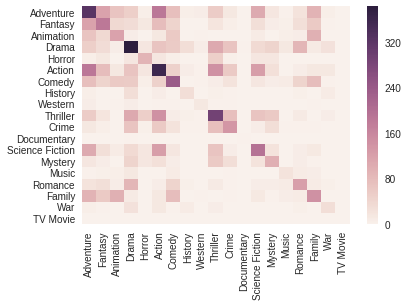

In [50]:
annot_lookup=[]
for i in xrange(len(nr_ids)):
    annot_lookup.append(Genre_ID_to_name[nr_ids[i]])

sns.heatmap(visGrid,xticklabels=annot_lookup,yticklabels=annot_lookup)

The above image shows how often the genres occur together, as a heatmap
Important thing to notice in the above plot is the diagonal. The diagonal corresponds to self-pairs, i.e. number of times a genre, say Drama occurred with Drama. Which is basically just a count of the total times that genre occurred!
As we can see there are a lot of dramas in the data set, it is also a very unspecific label. There are nearly no documentaries or TV Movies. Horror is a very distinct label, and romance is also not too widely spread.
To account for this unbalanced data, there are multiple things we can try to explore what interesting relationships can be found.

In [51]:
from sklearn.cluster import SpectralCoclustering

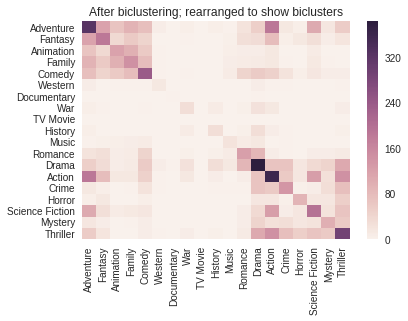

In [52]:
model = SpectralCoclustering(n_clusters=5)
model.fit(visGrid)
fit_data = visGrid[np.argsort(model.row_labels_)]
fit_data = fit_data[:,np.argsort(model.column_labels_)]

annot_lookup_sorted =[]
for i in np.argsort(model.row_labels_):
    annot_lookup_sorted.append(Genre_ID_to_name[nr_ids[i]])

sns.heatmap(fit_data,xticklabels=annot_lookup_sorted,yticklabels=annot_lookup_sorted, annot=False)
plt.title("After biclustering; rearranged to show biclusters")

plt.show()

Looking at the above figure, "boxes" or groups of movie genres automatically emerge!
Intuitively - Sci-Fic, Adventure, Action,Comedy, Family, Drama, Thriller, etc co-occur. AND, Comedy, Animation,Fantasy, Action etc co-occur.
That makes a lot of intuitive sense, right?
One challenge is the broad range of the drama genre. It makes the two clusters highly overlapping. If we merge it together with action thriller, etc. We will end up with nearly all movies just having that label.

**Based on playing around with the stuff above, we can sort the data into the following genre categories - "Drama, Action, ScienceFiction, exciting(thriller, crime, mystery), uplifting(adventure, fantasy, animation, comedy, romance, family), Horror, History"**

Note: that this categorization is subjective and by no means the only right solution. One could also just stay with the original labels and only exclude the ones with not enough data. Such tricks are important to balance the dataset, it allows us to increase or decrease the strength of certain signals, making it possible to improve our inferences :)

### Interesting Questing
This really should be a place for you to get creative and hopefully come up with better questions.

Here are some of my thoughts:
- Which actors are bound to a genre, and which can easily hop genres?
- Is there a trend in genre popularity over the years?

### Based on this new category set, we will now pull posters from TMDB as our training data!

In [53]:
# Done before, reading from pickle file now to maintain consistency of data!
# We now sample 100 movies per genre. Problem is that the sorting is by popular movies, so they will overlap. 
# Need to exclude movies that were already sampled. 
movies = []
baseyear = 2017
print('Starting pulling movies from TMDB. If you want to debug, uncomment the print command. This will take a while, please wait...')
done_ids=[]

for g_id in nr_ids:
    print('Pulling movies for genre ID: ', g_id)
    baseyear -=1
    for page in xrange(1,6,1):
        time.sleep(0.5)
        
        url = 'https://api.themoviedb.org/3/discover/movie?api_key=' + api_key
        url += '&language=en-US&sort_by=popularity.desc&year=' + str(baseyear) 
        url += '&with_genres=' + str(g_id) + '&page=' + str(page)

        data = urllib2.urlopen(url).read()
        dataDict = json.loads(data)
        movies.extend(dataDict["results"])
    done_ids.append(str(g_id))
print("Pulled movies for genres - "+','.join(done_ids))


Starting pulling movies from TMDB. If you want to debug, uncomment the print command. This will take a while, please wait...
('Pulling movies for genre ID: ', 12)
('Pulling movies for genre ID: ', 14)
('Pulling movies for genre ID: ', 16)
('Pulling movies for genre ID: ', 18)
('Pulling movies for genre ID: ', 27)
('Pulling movies for genre ID: ', 28)
('Pulling movies for genre ID: ', 35)
('Pulling movies for genre ID: ', 36)
('Pulling movies for genre ID: ', 37)
('Pulling movies for genre ID: ', 53)
('Pulling movies for genre ID: ', 80)
('Pulling movies for genre ID: ', 99)
('Pulling movies for genre ID: ', 878)
('Pulling movies for genre ID: ', 9648)
('Pulling movies for genre ID: ', 10402)
('Pulling movies for genre ID: ', 10749)
('Pulling movies for genre ID: ', 10751)
('Pulling movies for genre ID: ', 10752)
('Pulling movies for genre ID: ', 10770)
Pulled movies for genres - 12,14,16,18,27,28,35,36,37,53,80,99,878,9648,10402,10749,10751,10752,10770


In [54]:
#f6=open("movies_for_posters",'wb')
#pickle.dump(movies,f6)
#f6.close()

In [55]:
f6=open("movies_for_posters", 'rb')
movies=pickle.load(f6)
f6.close()

Let's remove any duplicates that we have in the list of movies

In [56]:
movie_ids = [m['id'] for m in movies]
print 'Originally we had ', len(movie_ids), ' movies'
movie_ids = np.unique(movie_ids)
print 'Unique movies ', len(movie_ids), ' movies'
seen_before = []

Originally we had  1767  movies
Unique movies  1703  movies
